# ANALYSIS

In [ ]:
#uncomment this below code to install imblearn package
# !pip install imbalanced-learn

In [1]:
import pandas as pd
import numpy as np
import sklearn
import pyreadr

#statistics
from scipy.stats import chi2_contingency, ttest_ind

import cudf #gpu-powered DataFrame (Pandas alternative)

#imbalance handling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, RepeatedEditedNearestNeighbours
from imblearn.pipeline import Pipeline

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler


#internal validation
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, PredefinedSplit, train_test_split

#performance metrices
from sklearn.metrics import confusion_matrix, classification_report, f1_score, balanced_accuracy_score, matthews_corrcoef, auc, average_precision_score, roc_auc_score, balanced_accuracy_score, roc_curve, accuracy_score

#Models selection
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from cuml.svm import SVC #gpu-powered SVM

#Tree pruning
from sklearn.tree._tree import TREE_LEAF


#save and load trained model
import pickle

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

from collections import Counter
import os

In [2]:
# Data loader
# trainingData = pd.read_csv('../FinalData/trainingDataEncoded_08102023.csv')
# validationData = pd.read_csv('../FinalData/validationDataEncoded_08102023.csv')
# evaluationData = pd.read_csv('../FinalData/evaluationDataEncoded_08102023.csv')
# evaluationDataWales = pd.read_csv('../FinalData/evaluationDataWalesEncoded_08102023.csv')
# evaluationDataScotland = pd.read_csv('../FinalData/evaluationDataScotlandEncoded_08102023.csv')

trainingData, validationData, internalEvaluationData, evaluationData, evaluationDataWales, evaluationDataScotland = pickle.load(open('../FinalData/dataset_scaled_2vs1_09122023.sav', 'rb'))

trainingData = trainingData[(trainingData.age >=8) & (trainingData.age <=80)]
validationData = validationData[(validationData.age >=8) & (validationData.age <=80)]
internalEvaluationData = internalEvaluationData[(internalEvaluationData.age >=8) & (internalEvaluationData.age <=80)]
evaluationData = evaluationData[(evaluationData.age >=8) & (evaluationData.age <=80)]
evaluationDataWales = evaluationDataWales[(evaluationDataWales.age >=8) & (evaluationDataWales.age <=80)]
evaluationDataScotland = evaluationDataScotland[(evaluationDataScotland.age >=8) & (evaluationDataScotland.age <=80)]

trainingData = trainingData.rename({'3MonthsOutcome': '3months', '6MonthsOutcome': '6months','9MonthsOutcome': '9months','12MonthsOutcome': '12months',}, axis=1)
validationData = validationData.rename({'3MonthsOutcome': '3months', '6MonthsOutcome': '6months','9MonthsOutcome': '9months','12MonthsOutcome': '12months',}, axis=1)
internalEvaluationData = internalEvaluationData.rename({'3MonthsOutcome': '3months', '6MonthsOutcome': '6months','9MonthsOutcome': '9months','12MonthsOutcome': '12months',}, axis=1)
evaluationData = evaluationData.rename({'3MonthsOutcome': '3months', '6MonthsOutcome': '6months','9MonthsOutcome': '9months','12MonthsOutcome': '12months',}, axis=1)
evaluationDataWales = evaluationDataWales.rename({'3MonthsOutcome': '3months', '6MonthsOutcome': '6months','9MonthsOutcome': '9months','12MonthsOutcome': '12months',}, axis=1)
evaluationDataScotland = evaluationDataScotland.rename({'3MonthsOutcome': '3months', '6MonthsOutcome': '6months','9MonthsOutcome': '9months','12MonthsOutcome': '12months',}, axis=1)

# trainingData = trainingData.rename({'outcome_3months': '3months', 'outcome_combined_6months': '6months','outcome_combined_12months': '12months','outcome_combined_24months': '24months',}, axis=1)
# validationData = validationData.rename({'outcome_3months': '3months', 'outcome_combined_6months': '6months','outcome_combined_12months': '12months','outcome_combined_24months': '24months',}, axis=1)
# internalEvaluationData = internalEvaluationData.rename({'outcome_3months': '3months', 'outcome_combined_6months': '6months','outcome_combined_12months': '12months','outcome_combined_24months': '24months',}, axis=1)
# evaluationData = evaluationData.rename({'outcome_3months': '3months', 'outcome_combined_6months': '6months','outcome_combined_12months': '12months','outcome_combined_24months': '24months',}, axis=1)
# evaluationDataWales = evaluationDataWales.rename({'outcome_3months': '3months', 'outcome_combined_6months': '6months','outcome_combined_12months': '12months','outcome_combined_24months': '24months',}, axis=1)
# evaluationDataScotland = evaluationDataScotland.rename({'outcome_3months': '3months', 'outcome_combined_6months': '6months','outcome_combined_12months': '12months','outcome_combined_24months': '24months',}, axis=1)

In [3]:
# # Data loader
# trainingData = pd.read_csv('../FinalData/trainingDataEncoded_2vs1_16112023.csv')
# validationData = pd.read_csv('../FinalData/validationDataEncoded_2vs1_16112023.csv')
# internalEvaluationData = pd.read_csv('../FinalData/internalEvaluationDataEncoded_2vs1_16112023.csv')
# evaluationData = pd.read_csv('../FinalData/evaluationDataEncoded_2vs1_16112023.csv')
# evaluationDataWales = pd.read_csv('../FinalData/evaluationDataWalesEncoded_2vs1_16112023.csv')
# evaluationDataScotland = pd.read_csv('../FinalData/evaluationDataScotlandEncoded_2vs1_16112023.csv')



In [4]:
target_outcomes = ['12months'] 
for target_outcome in target_outcomes:
    print('#######################################################')
    print(target_outcome)
    print(trainingData[target_outcome].value_counts(normalize=True))
    print(validationData[target_outcome].value_counts(normalize=True))
    # print(internalEvaluationData[target_outcome].value_counts(normalize=True))
    print(evaluationData[target_outcome].value_counts(normalize=True))
    print(evaluationDataWales[target_outcome].value_counts(normalize=True))
    print(evaluationDataScotland[target_outcome].value_counts(normalize=True))

#######################################################
12months
0    0.882398
1    0.117602
Name: 12months, dtype: float64
0    0.882648
1    0.117352
Name: 12months, dtype: float64
0    0.838714
1    0.161286
Name: 12months, dtype: float64
0    0.843046
1    0.156954
Name: 12months, dtype: float64
0    0.83103
1    0.16897
Name: 12months, dtype: float64


In [5]:
#Define feature candidates

features_columns = trainingData.columns.to_list()
exclude_columns = ['patid', 'practice_id', #identifier
                   'BMI', #use the categorical instead
                   'ethnicity', #use ethnic_group instead
                   'Spacer',  #all zero
                   
                   'outcome_3months', 'outcome_6months', 'outcome_9months', 'outcome_12months', 'outcome_15months', 'outcome_18months', 
                   'outcome_21months', 'outcome_24months', 'outcome_combined_6months', 'outcome_combined_9months', 'outcome_combined_12months', 
                   'outcome_combined_15months', 'outcome_combined_18months', 'outcome_combined_24months', '3months', '6months', '9months', '12months', '24months', #outcomes variable
                   
                   'postcode_district', 'County', 'LocalAuthority', 'OutputAreaClassification', #location related variables, use IMD decile only
                   
                   'cat_age', 'cat_average_daily_dose_ICS', 'cat_prescribed_daily_dose_ICS', 'cat_ICS_medication_possesion_ratio', 'cat_numOCS', 'cat_numOCSEvents', 
                   'cat_numOCSwithLRTI', 'cat_numAcuteRespEvents', 'cat_numAntibioticsEvents', 'cat_numAntibioticswithLRTI', 'cat_numAsthmaAttacks', 'cat_numHospEvents', 
                   'cat_numPCS', 'cat_numPCSAsthma', #use continous vars instead
                   
                   'count_rhinitis', 'count_cardiovascular', 'count_heartfailure',
                   'count_psoriasis', 'count_anaphylaxis', 'count_diabetes', 'count_ihd',
                   'count_anxiety', 'count_eczema', 'count_nasalpolyps',
                   'count_paracetamol', 'count_nsaids', 'count_betablocker', #use binary ones
                   
                   'paracetamol', 'nsaids', 'betablocker', #no data in evaluation
                   
                   'numOCSEvents', #duplicate with numOCS
                   
                   'month_12', 'month_4', 'month_5', 'month_10', 'month_1', 'month_6', 'month_3', 
                   'month_11', 'month_8', 'month_9', 'month_7', 'month_2', #month of attacks
                   
                   # 'system_EMIS', 'system_SystemOne', 'system_Vision', #primary care system used
                  ]
exclude_columns = exclude_columns + [x for x in features_columns if '_count' in x] #filter out commorbid count variables
features_columns = [x for x in features_columns if x not in exclude_columns]
print('Features size: ', len(features_columns))
print(features_columns)

Features size:  67
['sex', 'age', 'CharlsonScore', 'BTS_step', 'average_daily_dose_ICS', 'prescribed_daily_dose_ICS', 'ICS_medication_possesion_ratio', 'numOCS', 'PriorEducation', 'numPCS', 'numPCSAsthma', 'numAntibioticsEvents', 'numAntibioticswithLRTI', 'numOCSwithLRTI', 'numAsthmaAttacks', 'numAcuteRespEvents', 'numHospEvents', 'rhinitis', 'cardiovascular', 'heartfailure', 'psoriasis', 'anaphylaxis', 'diabetes', 'ihd', 'anxiety', 'eczema', 'nasalpolyps', 'ethnic_group_Asian - ethnic group', 'ethnic_group_Black - ethnic group', 'ethnic_group_Mixed ethnic census group', 'ethnic_group_Other ethnic group', 'ethnic_group_White - ethnic group', 'ethnic_group_not_recorded', 'smokingStatus_Active Smoker', 'smokingStatus_Former Smoker', 'smokingStatus_Non Smoker', 'DeviceType_BAI', 'DeviceType_DPI', 'DeviceType_NEB', 'DeviceType_pMDI', 'DeviceType_unknown', 'cat_BMI_normal', 'cat_BMI_not recorded', 'cat_BMI_obese', 'cat_BMI_overweight', 'cat_BMI_underweight', 'imd_decile_0', 'imd_decile_1', 

# UTILS

In [6]:
#Model evaluation function

def summariseResult (testX, testY, model):
    preds = model.predict(testX)
    # preds = [x[1] for x in preds]
    # tn, fp, fn, tp = confusion_matrix(testY, preds).ravel()
    # specificity = tn / (tn+fp)
    # sensitivity = tp / (tp+fn)
    # ppv = 100*tp/(tp+fp)
    # npv = 100*tn/(fn+tn)
    # acc = accuracy_score(testY, preds)
    # f1score = f1_score(testY, preds, average = 'binary')
    # balanceacc = balanced_accuracy_score(testY, preds)
    fpr, tpr, thresholds = roc_curve(testY, preds, pos_label=1)
    # aucscore = auc(fpr, tpr)
    aucscore = roc_auc_score(testY, preds)
    auprc = average_precision_score(testY, preds)
    # plot_confusion_matrix(model, testX, testY, cmap='viridis')  
    return np.round(aucscore,4), np.round(auprc,4)
    # return np.round(acc,4), np.round(specificity,4), np.round(sensitivity,4), np.round(aucscore,4), np.round(auprc,4), np.round(balanceacc,4), np.round(f1score,4), np.round(ppv,4), np.round(npv,4)

#Fix model name for visualisation

def modelNameFixer(x):
    if 'liblinear' in x:
        return 'Lasso'
    elif 'GaussianNB' in x:
        return 'GNB'
    elif 'SVC' in x:
        return 'SVC'
    elif 'RandomForest' in x:
        return 'RF'
    elif 'XGB' in x:
        return 'XGBoost'
    elif 'DecisionTree' in x:
        return 'DT'
    else:
        return 'LR'
    
    
# instantiate the model (using the default parameters)
def build_models (X_train, y_train, target_outcome, params_dict, model_fodler, fold):
    models = [] #list to store all the models
    print("Building models . . . .")

    #LR
    model = 'LR'
    params = params_dict[(params_dict['outcome']==target_outcome)&(params_dict['model']==model)]['params'].tolist()[0]
    # params = eval(params)
    print(params)
    lr_model = LogisticRegression(class_weight='balanced', C = params['C'], max_iter=params['max_iter'], solver=params['solver'], random_state=1234)
    lr_model.fit(X_train,y_train)
    pickle.dump(lr_model, open(model_folder+ target_outcome + '/'+ model + str(fold) + '.sav', 'wb'))
    models.append([model + str(fold), target_outcome, y_train.value_counts()[1]/y_train.value_counts()[0]]) 
    print("LR done")

    #Lasso
    model = 'Lasso'
    params = params_dict[(params_dict['outcome']==target_outcome)&(params_dict['model']==model)]['params'].tolist()[0]
    # params = eval(params)
    print(params)
    lasso_model = LogisticRegression(class_weight='balanced',  C = params['C'], max_iter=params['max_iter'], penalty='l1', solver=params['solver'], random_state=1234) #only the LIBLINEAR and SAGA (added in v0.19) solvers handle the L1 penalty
    lasso_model.fit(X_train, y_train)
    pickle.dump(lasso_model, open(model_folder+ target_outcome + '/'+ model + str(fold) + '.sav', 'wb'))
    models.append([model + str(fold), target_outcome, y_train.value_counts()[1]/y_train.value_counts()[0]])
    print("Lasso done")
    
    #Elastics
    model = 'Elastics'
    params = params_dict[(params_dict['outcome']==target_outcome)&(params_dict['model']==model)]['params'].tolist()[0]
    # params = eval(params)
    print(params)
    elastics_model = LogisticRegression(class_weight='balanced', solver='saga', l1_ratio=params['l1_ratio'], max_iter=params['max_iter'],  penalty = 'elasticnet', random_state=1234)
    elastics_model.fit(X_train, y_train)
    pickle.dump(elastics_model, open(model_folder+ target_outcome + '/'+ model + str(fold) + '.sav', 'wb'))
    models.append([model + str(fold), target_outcome, y_train.value_counts()[1]/y_train.value_counts()[0]])
    print("Elastics done")

    # #GNB
    # model = 'NB'
    # params = params_dict[(params_dict['outcome']==target_outcome)&(params_dict['model']==model)]['params'].tolist()[0]
    # # params = eval(params)
    # print(params)
    # gnb_model = GaussianNB(var_smoothing = params['var_smoothing'])
    # gnb_model.fit(X_train, y_train)
    # pickle.dump(gnb_model, open(model_folder+ target_outcome + '/'+ model + str(fold) + '.sav', 'wb'))  
    # models.append([model + str(fold), target_outcome, y_train.value_counts()[1]/y_train.value_counts()[0]])
    # print("GNB done")

    # # #SVM
    # model = 'SVM'
    # params = params_dict[(params_dict['outcome']==target_outcome)&(params_dict['model']==model)]['params'].tolist()[0]
    # # params = eval(params)
    # print(params)
    # svc_model = SVC(class_weight='balanced', C = params['C'], gamma=params['gamma'], kernel='rbf', random_state=1234, cache_size=1000)
    # svc_model.fit(X_train,y_train)
    # pickle.dump(svc_model, open(model_folder+ target_outcome + '/'+ model + str(fold) + '.sav', 'wb')) 
    # models.append([model + str(fold), target_outcome, y_train.value_counts()[1]/y_train.value_counts()[0]])
    # print("SVM done")

    #DT
    model = 'DT'
    params = params_dict[(params_dict['outcome']==target_outcome)&(params_dict['model']==model)]['params'].tolist()[0]
    # params = eval(params)
    print(params)
    dt_model = DecisionTreeClassifier(class_weight='balanced', max_depth=params['max_depth'], criterion=params['criterion'], splitter=params['splitter'], random_state=1234)
    dt_model.fit(X_train, y_train)
    pickle.dump(dt_model, open(model_folder+ target_outcome + '/'+ model + str(fold) + '.sav', 'wb'))    
    models.append([model + str(fold), target_outcome, y_train.value_counts()[1]/y_train.value_counts()[0]])
    print("DT done")

    #RF
    model = 'RF'
    params = params_dict[(params_dict['outcome']==target_outcome)&(params_dict['model']==model)]['params'].tolist()[0]
    # params = eval(params)
    print(params)
    rf_model = RandomForestClassifier(class_weight='balanced', max_depth=params['max_depth'], criterion=params['criterion'], n_estimators=params['n_estimators'], random_state=1234)
    rf_model.fit(X_train, y_train)
    pickle.dump(rf_model, open(model_folder+ target_outcome + '/'+ model + str(fold) + '.sav', 'wb'))     
    models.append([model + str(fold), target_outcome, y_train.value_counts()[1]/y_train.value_counts()[0]])
    print("RF done")

    #XGB
    model = 'XGB'
    params = params_dict[(params_dict['outcome']==target_outcome)&(params_dict['model']==model)]['params'].tolist()[0]
    # params = eval(params)
    print(params)
    scale_pos_ratio = y_train.value_counts()[0]/y_train.value_counts()[1]
    xgb_model = xgb.XGBClassifier(objective ='binary:logistic', max_depth = params['max_depth'], n_estimators = params['n_estimators'],   
                                  learning_rate=params['learning_rate'], reg_alpha = params['reg_alpha'], reg_lambda = params['reg_lambda'],
                                  importance_type = 'gain', scale_pos_weight = scale_pos_ratio, use_label_encoder=False, tree_method='gpu_hist', 
                                  gpu_id=0, verbosity = 0, random_state = 1234,)
    # xgb_model = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.001, tree_method='gpu_hist', gpu_id=0,  verbosity = 0, random_state = 1234)
    xgb_model.fit(X_train,y_train)
    pickle.dump(xgb_model, open(model_folder+ target_outcome + '/'+ model + str(fold) + '.sav', 'wb')) 
    models.append([model + str(fold),  target_outcome, y_train.value_counts()[1]/y_train.value_counts()[0]])
    print("XGB done")
    
    return models
    # return [xgb_model]

    


def is_leaf(inner_tree, index):
    # Check whether node is leaf node
    return (inner_tree.children_left[index] == TREE_LEAF and 
            inner_tree.children_right[index] == TREE_LEAF)

def prune_index(inner_tree, decisions, index=0):
    # Start pruning from the bottom - if we start from the top, we might miss
    # nodes that become leaves during pruning.
    # Do not use this directly - use prune_duplicate_leaves instead.
    if not is_leaf(inner_tree, inner_tree.children_left[index]):
        prune_index(inner_tree, decisions, inner_tree.children_left[index])
    if not is_leaf(inner_tree, inner_tree.children_right[index]):
        prune_index(inner_tree, decisions, inner_tree.children_right[index])

    # Prune children if both children are leaves now and make the same decision:     
    if (is_leaf(inner_tree, inner_tree.children_left[index]) and
        is_leaf(inner_tree, inner_tree.children_right[index]) and
        (decisions[index] == decisions[inner_tree.children_left[index]]) and 
        (decisions[index] == decisions[inner_tree.children_right[index]])):
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
        ##print("Pruned {}".format(index))

def prune_duplicate_leaves(mdl):
    # Remove leaves if both 
    decisions = mdl.tree_.value.argmax(axis=2).flatten().tolist() # Decision for each node
    prune_index(mdl.tree_, decisions)

# Train Model

In [ ]:
#params
params_dict = pd.read_csv('../Models/BS_new.csv')

In [ ]:
def process_params(param_items, best_param):
    a = eval(param_items)
    b = eval(best_param)
    c = {}
    for key, value in zip(a,b):
        c[key] = value
    return c

params_dict['params'] = params_dict.apply(lambda x: process_params(x.param_items, x.best_param), axis=1)

In [ ]:
params_dict[params_dict.outcome=='12months']

In [ ]:
%%time


#EXECUTE model training
summary_result_val = []
summary_result_eval = []
summary_result_Wales = []
summary_result_Scotland = []
# cols = ['model_name', 'outcome', 'class_ratio', 'acc','spec','sens','auc', 'auprc', 'balance_accuracy', 'f1_score', 'ppv', 'npv']
cols = ['model_name', 'outcome', 'class_ratio', 'auc', 'auprc']
model_folder = '../Models_trainValEval/'
fold = 0

for target_outcome in target_outcomes:
    models = pd.DataFrame(columns=['modelname', 'target_outcome', 'class_ratio'])
    print(target_outcome)
    y = trainingData[target_outcome]
    y_val = validationData[target_outcome]
    y = pd.concat([y, y_val])
    y_internaleval = internalEvaluationData[target_outcome]
    y_eval = evaluationData[target_outcome]
    y_eval_Wales = evaluationDataWales[target_outcome]
    y_eval_Scotland = evaluationDataScotland[target_outcome]
    #Build models -> it can be commented if the models have been trained
    models_temp = pd.DataFrame(build_models(X, y, target_outcome, params_dict, model_folder, fold), columns=['modelname', 'target_outcome', 'class_ratio'])
    models = pd.concat([models,models_temp]).reset_index(drop=True)

    #evaluate model
    for modelname, target_outcome, classratio in models.values:
        # print('======================================================================')
        print(modelname)
        model = pickle.load(open(model_folder+ target_outcome + '/'+ modelname + '.sav', 'rb'))
        summary_result_eval.append((str(modelname), target_outcome, classratio, ) + summariseResult (X_eval, y_eval, model) )
        summary_result_Wales.append((str(modelname), target_outcome, classratio, ) + summariseResult (X_eval_Wales, y_eval_Wales, model) )       
        summary_result_Scotland.append((str(modelname), target_outcome, classratio, ) + summariseResult (X_eval_Scotland, y_eval_Scotland, model) )       
        summary_result_val.append((str(modelname), target_outcome, classratio, ) + summariseResult (X_internaleval, y_internaleval, model) )       


summary_result_eval = pd.DataFrame(summary_result_eval, columns=cols)
summary_result_eval['model_num'] = summary_result_eval.index

summary_result_Wales = pd.DataFrame(summary_result_Wales, columns=cols)
summary_result_Wales['model_num'] = summary_result_Wales.index

summary_result_Scotland = pd.DataFrame(summary_result_Scotland, columns=cols)
summary_result_Scotland['model_num'] = summary_result_Scotland.index

summary_result_internaleval = pd.DataFrame(summary_result_val, columns=cols)
summary_result_internaleval['model_num'] = summary_result_val.index


In [ ]:
# summary_result_eval['model_name'] = summary_result_eval.apply(lambda x: modelNameFixer(x['model_name']), axis=1)
# summary_result_val['model_name'] = summary_result_val.apply(lambda x: modelNameFixer(x['model_name']), axis=1)
# summary_result_Wales['model_name'] = summary_result_Wales.apply(lambda x: modelNameFixer(x['model_name']), axis=1)
# summary_result_Scotland['model_name'] = summary_result_Scotland.apply(lambda x: modelNameFixer(x['model_name']), axis=1)

In [ ]:
# summary_result.to_csv('../Models/summary_result_test.csv', index_label=False, index=False)

In [ ]:
# summary_result = pd.read_csv('../Models/summary_result.csv')

In [ ]:
summary_result_internaleval['set'] = 'England'
summary_result_eval['set'] = 'Wales & Scotland'
summary_result_Wales['set'] = 'Wales'
summary_result_Scotland['set'] = 'Scotland'

combine = pd.concat([summary_result_internaleval, summary_result_eval, 
                     summary_result_Wales, summary_result_Scotland,
                    ])

In [ ]:
pickle.dump(combine, open('../Models/benchmarking_result_1year.sav', 'wb'))

In [ ]:
data = combine
data = combine[(combine.outcome=='12months')]
bar = sns.catplot(x = 'model_name',       # x variable name
            y = 'auc',       # y variable name            
            data=data,
            kind = "bar",
            hue = 'set',
            # hue_order=['10-fold CV', 'Evaluation Set', 'Wales', 'Scotland'],
            height=8,
            row='outcome',
            aspect=1.8,
            errorbar = None,)

for items in bar.axes:
    for ax in items:
        for p in ax.patches:
            ax.text(p.get_x() + 0.01, 
                p.get_height() * 1.005, 
                '{0:.4f}'.format(p.get_height()), 
                color='black', rotation=20, fontsize=8)

ax.set_ylim(0.5, .9)
# ax.set_ylabel('AUC Score', fontsize=13)
ax.set_xlabel('Method', fontsize=13)

# DL

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional, Input, concatenate, Reshape, Activation, Flatten, Add, BatchNormalization, Multiply, LeakyReLU, Conv1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.metrics import AUC, SensitivityAtSpecificity
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, Adamax, SGD, Adadelta
from tensorflow.keras.initializers import Constant
from tensorflow.keras.regularizers import L1L2, L1, L2
from livelossplot import PlotLossesKeras

import keras_tuner

#internal validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, balanced_accuracy_score, matthews_corrcoef, auc, average_precision_score, roc_auc_score, balanced_accuracy_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import pickle
import time
# fix random seed for reproducibility
tf.random.set_seed(1234)



2023-12-10 02:32:16.792981: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-10 02:32:17.158431: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 02:32:17.158484: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 02:32:17.160662: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 02:32:17.334248: I tensorflow/core/platform/cpu_feature_g

In [8]:
X = trainingData[features_columns]
X_val = validationData[features_columns]
# X = pd.concat([X, X_val])

X_internaleval = internalEvaluationData[features_columns]
X_eval = evaluationData[features_columns]
X_eval_Wales = evaluationDataWales[features_columns]
X_eval_Scotland = evaluationDataScotland[features_columns]

print(X.shape)
print(X_val.shape)
print(X_eval.shape)
print(X_eval_Wales.shape)
print(X_eval_Scotland.shape)

# target_outcomes = ['3months', '6months', '12months', '24months'] 
target_outcomes = ['12months'] 

(390087, 67)
(121975, 67)
(23883, 67)
(15272, 67)
(8611, 67)


## initial model

In [ ]:
%%time

# create the model
# embedding_vector_length = 50
y = trainingData[target_outcomes[0]].values
y_val = validationData[target_outcomes[0]].values
earlyStopping = EarlyStopping(monitor='val_auc', patience=20, verbose=0, mode='max', restore_best_weights=True)
mcp_save = ModelCheckpoint('../SeqModel/seqModel_FCN.mdl_wts.hdf5', save_best_only=True, monitor='val_auc', mode='min')
pos_weight = sum(x == 0 for x in y)/sum(x == 1 for x in y)
class_weight = {0:1, 1:pos_weight}
# print(class_weight)
set
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=L1L2(l1=0.0, l2=0.1), input_shape = (X.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=L1L2(l1=0.0, l2=0.1)))
    model.add(Dropout(0.5))
    # model.add(Conv1D(64, 3, activation='relu', input_shape = (X.shape[1],)))
    model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=L1L2(l1=0.0, l2=0.1)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    opt = Adadelta(learning_rate=5e-3, clipvalue=0.3)
    metrics = [
        AUC(num_thresholds=1000, name='auc'),
        AUC(num_thresholds=1000, name='auprc', curve='PR'),
    ]
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=metrics, )
    print(model.summary())
    history = model.fit(X.values, y, validation_data=(X_val.values, y_val), epochs=200, batch_size=128, class_weight=class_weight,  callbacks = [earlyStopping])

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
# plt.ylim(0.3, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['auprc'])
plt.plot(history.history['val_auprc'])
plt.title('model auprc')
# plt.ylim(0.3, 1)
plt.ylabel('auprc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_internaleval = internalEvaluationData[target_outcomes[0]]
y_eval = evaluationData[target_outcomes[0]]
y_eval_Wales = evaluationDataWales[target_outcomes[0]]
y_eval_Scotland = evaluationDataScotland[target_outcomes[0]]
print(model.evaluate(X_internaleval.values, y_internaleval))
print(model.evaluate(X_eval.values, y_eval))
print(model.evaluate(X_eval_Wales.values, y_eval_Wales))
print(model.evaluate(X_eval_Scotland.values, y_eval_Scotland))

## Keras tunes

In [9]:
# use only 20% of training data for parameter search
ignore, use = train_test_split(trainingData, stratify=trainingData[target_outcomes[0]], test_size=0.1, random_state=1234)
search_train, search_val = train_test_split(use, stratify=use[target_outcomes[0]], test_size=0.2, random_state=1234)
search_train.reset_index(inplace=True, drop=True)
search_val.reset_index(inplace=True, drop=True)
X_train = search_train[features_columns]
X_val = search_val[features_columns]
y_train = search_train[target_outcomes[0]]
y_val = search_val[target_outcomes[0]]

In [10]:
print(X_train.shape)
print(X_val.shape)

(31207, 67)
(7802, 67)


In [11]:
print(search_train[target_outcomes[0]].value_counts()[0]/search_train[target_outcomes[0]].value_counts()[1])
print(search_val[target_outcomes[0]].value_counts()[0]/search_val[target_outcomes[0]].value_counts()[1])

7.503269754768392
7.498910675381263


### Dense parameters search [unit, activation, kerner_initializer, kernel_regularizer]

In [12]:
# %%time

# create the model
# embedding_vector_length = 50
hp = keras_tuner.HyperParameters()
earlyStopping = EarlyStopping(monitor='val_auc', patience=20, verbose=0, mode='max', restore_best_weights=True)
mcp_save = ModelCheckpoint('../SeqModel/seqModel_FCN.mdl_wts.hdf5', save_best_only=True, monitor='val_auc', mode='min')
pos_weight = sum(x == 0 for x in y_train)/sum(x == 1 for x in y_train)
class_weight = {0:1, 1:pos_weight}
# print(class_weight)

class MyHyperModel_denseLayerParametersSearch(keras_tuner.HyperModel):
        
    def build(self, hp):
        model = Sequential()
        neurons_layer1 = hp.Int("units_layer1", min_value=32, max_value=128, step=16)
        model.add(Dense(units=neurons_layer1, 
                        kernel_initializer=hp.Choice("kernel_initializer_layer1", ["glorot_uniform", "glorot_normal", "lecun_uniform", "lecun_normal"]), 
                        kernel_regularizer=L1L2(l1=hp.Float("kernel_l1_dense1", min_value=0.0, max_value=.1, step=0.02), 
                                                l2=hp.Float("kernel_l2_dense1", min_value=0.0, max_value=.1, step=0.02)
                                               ),
                        bias_regularizer=L1L2(l1=hp.Float("bias_l1_dense1", min_value=0.0, max_value=.1, step=0.02), 
                                                l2=hp.Float("bias_l2_dense1", min_value=0.0, max_value=.1, step=0.02)
                                               ),
                        activity_regularizer=L1L2(l1=hp.Float("act_l1_dense1", min_value=0.0, max_value=.1, step=0.02), 
                                                l2=hp.Float("act_l2_dense1", min_value=0.0, max_value=.1, step=0.02)
                                               ),
                        input_shape = (X_train.shape[1],)
                       )
                 )
        model.add(BatchNormalization())
        model.add(Activation(hp.Choice("activation", ["relu", "elu", "gelu", "silu", "selu"])))
        model.add(Dropout(rate=hp.Float("rate", min_value=0.1, max_value=0.5, step=0.1)))

        model.add(Dense(1, activation='sigmoid'))
        opt = Adam()
        metrics = [
            AUC(num_thresholds=1000, name='auc'),
            AUC(num_thresholds=1000, name='auprc', curve='PR'),
        ]
        model.compile(loss='binary_crossentropy', optimizer=opt, metrics=metrics, )
        print(model.summary())
        return model
    
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            **kwargs,
        )

    
    # history = model.fit(X.values, y, validation_data=(X_val.values, y_val), epochs=200, batch_size=128, class_weight=class_weight,  callbacks = [earlyStopping])

In [13]:
start_time = time.time()

with tf.device('/GPU:0'):
    model = MyHyperModel_denseLayerParametersSearch()
    tuner = keras_tuner.Hyperband(
        hypermodel= model,
        objective=keras_tuner.Objective("val_auc", direction="max"),
        max_epochs=25,
        hyperband_iterations=1,
        overwrite=True,
        directory='../SeqModel/tuner/',
        project_name="denseParameters",
    )

    tuner.search_space_summary()
    earlyStopping = EarlyStopping(monitor='val_auc', patience=3, verbose=0, mode='max', restore_best_weights=True)

    tuner.search(X_train.values, y_train, 
                 validation_data=(X_val.values, y_val),
                 epochs=10, 
                 batch_size = 128,
                 class_weight = class_weight,
                 callbacks = [earlyStopping])

print("--- Training time: %s seconds ---" % (time.time() - start_time))

Trial 30 Complete [00h 00m 42s]
val_auc: 0.8040910363197327

Best val_auc So Far: 0.8231764435768127
Total elapsed time: 00h 11m 12s
--- Training time: 686.5202512741089 seconds ---


In [14]:
tuner.results_summary(num_trials=3)

Results summary
Results in ../SeqModel/tuner/denseParameters
Showing 3 best trials
Objective(name="val_auc", direction="max")

Trial 0016 summary
Hyperparameters:
units_layer1: 48
kernel_initializer_layer1: lecun_uniform
kernel_l1_dense1: 0.0
kernel_l2_dense1: 0.02
bias_l1_dense1: 0.04
bias_l2_dense1: 0.1
act_l1_dense1: 0.04
act_l2_dense1: 0.08
activation: silu
rate: 0.2
tuner/epochs: 25
tuner/initial_epoch: 9
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.8231764435768127

Trial 0013 summary
Hyperparameters:
units_layer1: 48
kernel_initializer_layer1: lecun_uniform
kernel_l1_dense1: 0.0
kernel_l2_dense1: 0.02
bias_l1_dense1: 0.04
bias_l2_dense1: 0.1
act_l1_dense1: 0.04
act_l2_dense1: 0.08
activation: silu
rate: 0.2
tuner/epochs: 9
tuner/initial_epoch: 3
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0007
Score: 0.8175022602081299

Trial 0012 summary
Hyperparameters:
units_layer1: 80
kernel_initializer_layer1: lecun_normal
kernel_l1_dense1: 0.02
kernel_l2_dense1: 0.06
b

### number of layers

In [17]:
# %%time

# create the model
# embedding_vector_length = 50
hp = keras_tuner.HyperParameters()
earlyStopping = EarlyStopping(monitor='val_auc', patience=20, verbose=0, mode='max', restore_best_weights=True)
mcp_save = ModelCheckpoint('../SeqModel/seqModel_FCN.mdl_wts.hdf5', save_best_only=True, monitor='val_auc', mode='min')
pos_weight = sum(x == 0 for x in y_train)/sum(x == 1 for x in y_train)
class_weight = {0:1, 1:pos_weight}
# print(class_weight)

class MyHyperModel_numLayers(keras_tuner.HyperModel):
        
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=48, 
                        kernel_initializer="lecun_uniform", 
                        kernel_regularizer=L1L2(l1=0,l2=0.02),
                        bias_regularizer=L1L2(l1=0.04,l2=0.1),
                        activity_regularizer=L1L2(l1=0.04,l2=0.08),
                        input_shape = (X_train.shape[1],)
                       )
                )
        model.add(BatchNormalization())
        model.add(Activation("silu"))
        model.add(Dropout(rate=0.2))
        
        layers = hp.Int("num_layers", min_value=1, max_value=10, step=1)
        if layers > 0:
            for i in range(layers):
                model.add(Dense(units=48, 
                            kernel_initializer="lecun_uniform", 
                            kernel_regularizer=L1L2(l1=0,l2=0.02),
                            bias_regularizer=L1L2(l1=0.04,l2=0.1),
                            activity_regularizer=L1L2(l1=0.04,l2=0.08),
                           )
                    )
                model.add(BatchNormalization())
                model.add(Activation("silu"))
                model.add(Dropout(rate=0.2))

        model.add(Dense(1, activation='sigmoid'))
        opt = Adam()
        metrics = [
            AUC(num_thresholds=1000, name='auc'),
            AUC(num_thresholds=1000, name='auprc', curve='PR'),
        ]
        model.compile(loss='binary_crossentropy', optimizer=opt, metrics=metrics, )
        print(model.summary())
        return model
    
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            **kwargs,
        )

    
    # history = model.fit(X.values, y, validation_data=(X_val.values, y_val), epochs=200, batch_size=128, class_weight=class_weight,  callbacks = [earlyStopping])

In [18]:
start_time = time.time()

with tf.device('/GPU:0'):
    model = MyHyperModel_numLayers()
    tuner = keras_tuner.Hyperband(
        hypermodel= model,
        objective=keras_tuner.Objective("val_auc", direction="max"),
        max_epochs=25,
        hyperband_iterations=1,
        overwrite=True,
        directory='../SeqModel/tuner/',
        project_name="numLayers",
    )

    tuner.search_space_summary()
    earlyStopping = EarlyStopping(monitor='val_auc', patience=3, verbose=0, mode='max', restore_best_weights=True)

    tuner.search(X_train.values, y_train, 
                 validation_data=(X_val.values, y_val),
                 epochs=10, 
                 batch_size = 128,
                 class_weight = class_weight,
                 callbacks = [earlyStopping])

print("--- Training time: %s seconds ---" % (time.time() - start_time))

Trial 10 Complete [00h 00m 33s]
val_auc: 0.7350594401359558

Best val_auc So Far: 0.7984053492546082
Total elapsed time: 00h 04m 51s
--- Training time: 291.5666983127594 seconds ---


In [19]:
tuner.results_summary(num_trials=3)

Results summary
Results in ../SeqModel/tuner/numLayers
Showing 3 best trials
Objective(name="val_auc", direction="max")

Trial 0004 summary
Hyperparameters:
num_layers: 1
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.7984053492546082

Trial 0000 summary
Hyperparameters:
num_layers: 4
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.7877047061920166

Trial 0007 summary
Hyperparameters:
num_layers: 2
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.7854354977607727


### optimizer

In [20]:
# %%time

# create the model
# embedding_vector_length = 50
hp = keras_tuner.HyperParameters()
earlyStopping = EarlyStopping(monitor='val_auc', patience=20, verbose=0, mode='max', restore_best_weights=True)
mcp_save = ModelCheckpoint('../SeqModel/seqModel_FCN.mdl_wts.hdf5', save_best_only=True, monitor='val_auc', mode='min')
pos_weight = sum(x == 0 for x in y_train)/sum(x == 1 for x in y_train)
class_weight = {0:1, 1:pos_weight}
# print(class_weight)

class MyHyperModel_optimizer(keras_tuner.HyperModel):
        
    def build(self, hp):
        model = Sequential()        
        model.add(Dense(units=48, 
                        kernel_initializer="lecun_uniform", 
                        kernel_regularizer=L1L2(l1=0,l2=0.02),
                        bias_regularizer=L1L2(l1=0.04,l2=0.1),
                        activity_regularizer=L1L2(l1=0.04,l2=0.08),
                        input_shape = (X_train.shape[1],)
                       )
                )
        model.add(BatchNormalization())
        model.add(Activation("silu"))
        model.add(Dropout(rate=0.2))
        
        for i in range(1):
            model.add(Dense(units=48, 
                        kernel_initializer="lecun_uniform", 
                        kernel_regularizer=L1L2(l1=0,l2=0.02),
                        bias_regularizer=L1L2(l1=0.04,l2=0.1),
                        activity_regularizer=L1L2(l1=0.04,l2=0.08),
                       )
                )
            model.add(BatchNormalization())
            model.add(Activation("silu"))
            model.add(Dropout(rate=0.2))
        
        model.add(Dense(1, activation='sigmoid'))
        opt = hp.Choice("opt", ['Adadelta', 'Adam', 'Adamax', 'RMSprop', 'SGD'])
        metrics = [
            AUC(num_thresholds=1000, name='auc'),
            AUC(num_thresholds=1000, name='auprc', curve='PR'),
        ]
        model.compile(loss='binary_crossentropy', optimizer=opt, metrics=metrics, )
        print(model.summary())
        return model
    
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            **kwargs,
        )

    
    # history = model.fit(X.values, y, validation_data=(X_val.values, y_val), epochs=200, batch_size=128, class_weight=class_weight,  callbacks = [earlyStopping])

In [21]:
start_time = time.time()

with tf.device('/GPU:0'):
    model = MyHyperModel_optimizer()
    tuner = keras_tuner.Hyperband(
        hypermodel= model,
        objective=keras_tuner.Objective("val_auc", direction="max"),
        max_epochs=25,
        hyperband_iterations=1,
        overwrite=True,
        directory='../SeqModel/tuner/',
        project_name="optimizer",
    )

    tuner.search_space_summary()
    earlyStopping = EarlyStopping(monitor='val_auc', patience=3, verbose=0, mode='max', restore_best_weights=True)

    tuner.search(X_train.values, y_train, 
                 validation_data=(X_val.values, y_val),
                 epochs=10, 
                 batch_size = 128,
                 class_weight = class_weight,
                 callbacks = [earlyStopping])

print("--- Training time: %s seconds ---" % (time.time() - start_time))

Trial 5 Complete [00h 00m 15s]
val_auc: 0.3647477626800537

Best val_auc So Far: 0.8085951805114746
Total elapsed time: 00h 01m 23s
--- Training time: 83.5087502002716 seconds ---


In [22]:
tuner.results_summary(num_trials=3)

Results summary
Results in ../SeqModel/tuner/optimizer
Showing 3 best trials
Objective(name="val_auc", direction="max")

Trial 0002 summary
Hyperparameters:
opt: Adam
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.8085951805114746

Trial 0003 summary
Hyperparameters:
opt: RMSprop
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.784258246421814

Trial 0001 summary
Hyperparameters:
opt: Adamax
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.7760705351829529


### optimizer parameter

In [24]:
# %%time

# create the model
# embedding_vector_length = 50
hp = keras_tuner.HyperParameters()
earlyStopping = EarlyStopping(monitor='val_auc', patience=20, verbose=0, mode='max', restore_best_weights=True)
mcp_save = ModelCheckpoint('../SeqModel/seqModel_FCN.mdl_wts.hdf5', save_best_only=True, monitor='val_auc', mode='min')
pos_weight = sum(x == 0 for x in y_train)/sum(x == 1 for x in y_train)
class_weight = {0:1, 1:pos_weight}
# print(class_weight)

class MyHyperModel_optimizerParameters(keras_tuner.HyperModel):
        
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=48, 
                        kernel_initializer="lecun_uniform", 
                        kernel_regularizer=L1L2(l1=0,l2=0.02),
                        bias_regularizer=L1L2(l1=0.04,l2=0.1),
                        activity_regularizer=L1L2(l1=0.04,l2=0.08),
                        input_shape = (X_train.shape[1],)
                       )
                )
        model.add(BatchNormalization())
        model.add(Activation("silu"))
        model.add(Dropout(rate=0.2))
        
        for i in range(1):
            model.add(Dense(units=48, 
                        kernel_initializer="lecun_uniform", 
                        kernel_regularizer=L1L2(l1=0,l2=0.02),
                        bias_regularizer=L1L2(l1=0.04,l2=0.1),
                        activity_regularizer=L1L2(l1=0.04,l2=0.08),
                       )
                )
            model.add(BatchNormalization())
            model.add(Activation("silu"))
            model.add(Dropout(rate=0.2))
        
        model.add(Dense(1, activation='sigmoid'))
        lr=hp.Choice("lr", [1e-3, 5e-4, 1e-4, 5e-5, 1e-5]) 
        clipvalue=hp.Float("clipvalue", min_value=0.1, max_value=0.7, step=0.2)
        opt = Adam(learning_rate=lr, clipvalue=clipvalue)
        metrics = [
            AUC(num_thresholds=1000, name='auc'),
            AUC(num_thresholds=1000, name='auprc', curve='PR'),
        ]
        model.compile(loss='binary_crossentropy', optimizer=opt, metrics=metrics, )
        print(model.summary())
        return model
    
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            **kwargs,
        )

    
    # history = model.fit(X.values, y, validation_data=(X_val.values, y_val), epochs=200, batch_size=128, class_weight=class_weight,  callbacks = [earlyStopping])

In [25]:
start_time = time.time()

with tf.device('/GPU:0'):
    model = MyHyperModel_optimizerParameters()
    tuner = keras_tuner.Hyperband(
        hypermodel= model,
        objective=keras_tuner.Objective("val_auc", direction="max"),
        max_epochs=25,
        hyperband_iterations=1,
        overwrite=True,
        directory='../SeqModel/tuner/',
        project_name="optimizerParameters",
    )

    tuner.search_space_summary()
    earlyStopping = EarlyStopping(monitor='val_auc', patience=3, verbose=0, mode='max', restore_best_weights=True)

    tuner.search(X_train.values, y_train, 
                 validation_data=(X_val.values, y_val),
                 epochs=10, 
                 batch_size = 128,
                 class_weight = class_weight,
                 callbacks = [earlyStopping])

print("--- Training time: %s seconds ---" % (time.time() - start_time))

Trial 20 Complete [00h 00m 40s]
val_auc: 0.5970169305801392

Best val_auc So Far: 0.8271567821502686
Total elapsed time: 00h 07m 50s
--- Training time: 471.19980454444885 seconds ---


In [26]:
tuner.results_summary(num_trials=3)

Results summary
Results in ../SeqModel/tuner/optimizerParameters
Showing 3 best trials
Objective(name="val_auc", direction="max")

Trial 0016 summary
Hyperparameters:
lr: 0.0005
clipvalue: 0.1
tuner/epochs: 25
tuner/initial_epoch: 9
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.8271567821502686

Trial 0014 summary
Hyperparameters:
lr: 0.0005
clipvalue: 0.1
tuner/epochs: 9
tuner/initial_epoch: 3
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0009
Score: 0.8206464052200317

Trial 0015 summary
Hyperparameters:
lr: 0.0005
clipvalue: 0.30000000000000004
tuner/epochs: 9
tuner/initial_epoch: 3
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0004
Score: 0.8155041933059692


### search all together

In [27]:
# %%time

# create the model
# embedding_vector_length = 50
hp = keras_tuner.HyperParameters()
earlyStopping = EarlyStopping(monitor='val_auc', patience=20, verbose=0, mode='max', restore_best_weights=True)
mcp_save = ModelCheckpoint('../SeqModel/seqModel_FCN.mdl_wts.hdf5', save_best_only=True, monitor='val_auc', mode='min')
pos_weight = sum(x == 0 for x in y_train)/sum(x == 1 for x in y_train)
class_weight = {0:1, 1:pos_weight}
# print(class_weight)

class MyHyperModel_allParameters(keras_tuner.HyperModel):
        
    def build(self, hp):
        model = Sequential()
        
        neurons_layer1 = hp.Int("units_layer1", min_value=32, max_value=128, step=16)
        model.add(Dense(units=neurons_layer1, 
                        kernel_initializer=hp.Choice("kernel_initializer_layer1", ["glorot_uniform", "glorot_normal", "lecun_uniform", "lecun_normal"]), 
                        kernel_regularizer=L1L2(l1=hp.Float("kernel_l1_dense1", min_value=0.0, max_value=.1, step=0.02), 
                                                l2=hp.Float("kernel_l2_dense1", min_value=0.0, max_value=.1, step=0.02)
                                               ),
                        bias_regularizer=L1L2(l1=hp.Float("bias_l1_dense1", min_value=0.0, max_value=.1, step=0.02), 
                                                l2=hp.Float("bias_l2_dense1", min_value=0.0, max_value=.1, step=0.02)
                                               ),
                        activity_regularizer=L1L2(l1=hp.Float("act_l1_dense1", min_value=0.0, max_value=.1, step=0.02), 
                                                l2=hp.Float("act_l2_dense1", min_value=0.0, max_value=.1, step=0.02)
                                               ),
                        input_shape = (X_train.shape[1],)
                       )
                 )
        model.add(BatchNormalization())
        model.add(Activation(hp.Choice("activation", ["relu", "elu", "gelu", "silu", "selu"])))
        model.add(Dropout(rate=hp.Float("rate", min_value=0.1, max_value=0.5, step=0.1)))
        
        layers = hp.Int("num_layers", min_value=0, max_value=10, step=1)
        if layers > 0:
            for i in range(layers):
                neurons_layer1 = hp.Int("units_layer"+str(i), min_value=32, max_value=128, step=16)
                model.add(Dense(units=neurons_layer1, 
                                kernel_initializer=hp.Choice("kernel_initializer_layer1", ["glorot_uniform", "glorot_normal", "lecun_uniform", "lecun_normal"]), 
                                kernel_regularizer=L1L2(l1=hp.Float("kernel_l1_dense1", min_value=0.0, max_value=.1, step=0.02), 
                                                        l2=hp.Float("kernel_l2_dense1", min_value=0.0, max_value=.1, step=0.02)
                                                       ),
                                bias_regularizer=L1L2(l1=hp.Float("bias_l1_dense1", min_value=0.0, max_value=.1, step=0.02), 
                                                        l2=hp.Float("bias_l2_dense1", min_value=0.0, max_value=.1, step=0.02)
                                                       ),
                                activity_regularizer=L1L2(l1=hp.Float("act_l1_dense1", min_value=0.0, max_value=.1, step=0.02), 
                                                        l2=hp.Float("act_l2_dense1", min_value=0.0, max_value=.1, step=0.02)
                                                       ),
                               )
                         )
                model.add(BatchNormalization())
                model.add(Activation(hp.Choice("activation", ["relu", "elu", "gelu", "silu", "selu"])))
                model.add(Dropout(rate=hp.Float("rate", min_value=0.1, max_value=0.5, step=0.1)))

        model.add(Dense(1, activation='sigmoid'))
        lr=hp.Choice("lr", [1e-3, 5e-4, 1e-4, 5e-5, 1e-5]) 
        clipvalue=hp.Float("clipvalue", min_value=0.1, max_value=0.7, step=0.2)
        opt = Adam(learning_rate=lr, clipvalue=clipvalue)
        metrics = [
            AUC(num_thresholds=1000, name='auc'),
            AUC(num_thresholds=1000, name='auprc', curve='PR'),
        ]
        model.compile(loss='binary_crossentropy', optimizer=opt, metrics=metrics, )
        print(model.summary())
        return model
    
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            **kwargs,
        )

    
    # history = model.fit(X.values, y, validation_data=(X_val.values, y_val), epochs=200, batch_size=128, class_weight=class_weight,  callbacks = [earlyStopping])

In [28]:
start_time = time.time()

with tf.device('/GPU:0'):
    model = MyHyperModel_allParameters()
    tuner = keras_tuner.Hyperband(
        hypermodel= model,
        objective=keras_tuner.Objective("val_auc", direction="max"),
        max_epochs=25,
        hyperband_iterations=1,
        overwrite=True,
        directory='../SeqModel/tuner/',
        project_name="allParameters",
    )

    tuner.search_space_summary()
    earlyStopping = EarlyStopping(monitor='val_auc', patience=3, verbose=0, mode='max', restore_best_weights=True)

    tuner.search(X_train.values, y_train,
                 validation_data=(X_val.values, y_val),
                 epochs=10, 
                 batch_size = 128,
                 class_weight = class_weight,
                 callbacks = [earlyStopping])

print("--- Training time: %s seconds ---" % (time.time() - start_time))

Trial 30 Complete [00h 01m 14s]
val_auc: 0.8134291768074036

Best val_auc So Far: 0.8156254887580872
Total elapsed time: 00h 20m 29s
--- Training time: 1230.8458552360535 seconds ---


In [29]:
tuner.results_summary(num_trials=3)

Results summary
Results in ../SeqModel/tuner/allParameters
Showing 3 best trials
Objective(name="val_auc", direction="max")

Trial 0016 summary
Hyperparameters:
units_layer1: 112
kernel_initializer_layer1: glorot_normal
kernel_l1_dense1: 0.0
kernel_l2_dense1: 0.08
bias_l1_dense1: 0.1
bias_l2_dense1: 0.02
act_l1_dense1: 0.04
act_l2_dense1: 0.06
activation: silu
rate: 0.4
num_layers: 3
lr: 0.001
clipvalue: 0.30000000000000004
units_layer0: 48
units_layer2: 64
units_layer3: 96
units_layer4: 96
units_layer5: 64
units_layer6: 32
units_layer7: 64
units_layer8: 64
units_layer9: 64
tuner/epochs: 25
tuner/initial_epoch: 9
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.8156254887580872

Trial 0029 summary
Hyperparameters:
units_layer1: 80
kernel_initializer_layer1: lecun_normal
kernel_l1_dense1: 0.06
kernel_l2_dense1: 0.04
bias_l1_dense1: 0.02
bias_l2_dense1: 0.0
act_l1_dense1: 0.02
act_l2_dense1: 0.08
activation: selu
rate: 0.2
num_layers: 2
lr: 0.0001
clipvalue: 0.30000000000000

## updated model

In [8]:
X = trainingData[features_columns]
X_val = validationData[features_columns]
# X = pd.concat([X, X_val])

X_internaleval = internalEvaluationData[features_columns]
X_eval = evaluationData[features_columns]
X_eval_Wales = evaluationDataWales[features_columns]
X_eval_Scotland = evaluationDataScotland[features_columns]

print(X.shape)
print(X_val.shape)
print(X_eval.shape)
print(X_eval_Wales.shape)
print(X_eval_Scotland.shape)

# target_outcomes = ['3months', '6months', '12months', '24months'] 
target_outcomes = ['12months'] 

(390087, 67)
(121975, 67)
(23883, 67)
(15272, 67)
(8611, 67)


In [ ]:
%%time

# create the model
# embedding_vector_length = 50
y = trainingData[target_outcomes[0]].values
y_val = validationData[target_outcomes[0]].values
earlyStopping = EarlyStopping(monitor='val_auc', patience=10, verbose=0, mode='max', restore_best_weights=True)
mcp_save = ModelCheckpoint('../SeqModel/seqModel_FCN.mdl_wts.hdf5', save_best_only=True, monitor='val_auc', mode='min')
pos_weight = sum(x == 0 for x in y)/sum(x == 1 for x in y)
class_weight = {0:1, 1:pos_weight}
# print(class_weight)
set
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Dense(units=48, 
                    kernel_initializer="lecun_uniform", 
                    kernel_regularizer=L1L2(l1=0,l2=0.02),
                    bias_regularizer=L1L2(l1=0.04,l2=0.1),
                    activity_regularizer=L1L2(l1=0.04,l2=0.08),
                    input_shape = (X.shape[1],)
                   )
            )
    model.add(BatchNormalization())
    model.add(Activation("silu"))
    # model.add(Dropout(rate=0.2))

    for i in range(1):
        model.add(Dense(units=48, 
                    kernel_initializer="lecun_uniform", 
                    kernel_regularizer=L1L2(l1=0,l2=0.02),
                    bias_regularizer=L1L2(l1=0.04,l2=0.1),
                    activity_regularizer=L1L2(l1=0.04,l2=0.08),
                   )
            )
        model.add(BatchNormalization())
        model.add(Activation("silu"))
        model.add(Dropout(rate=0.2))

    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(learning_rate=5e-4, clipvalue=.1)
    metrics = [
        AUC(num_thresholds=1000, name='auc'),
        AUC(num_thresholds=1000, name='auprc', curve='PR'),
    ]
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=metrics, )
    print(model.summary())
    history = model.fit(X.values, y, validation_data=(X_val.values, y_val), epochs=200, batch_size=32, class_weight=class_weight,  callbacks = [earlyStopping])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 48)                3264      
                                                                 
 batch_normalization_1 (Bat  (None, 48)                192       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 48)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                2352      
                                                                 
 batch_normalization_2 (Bat  (None, 48)                192       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48)               

dict_keys(['loss', 'auc', 'auprc', 'val_loss', 'val_auc', 'val_auprc'])


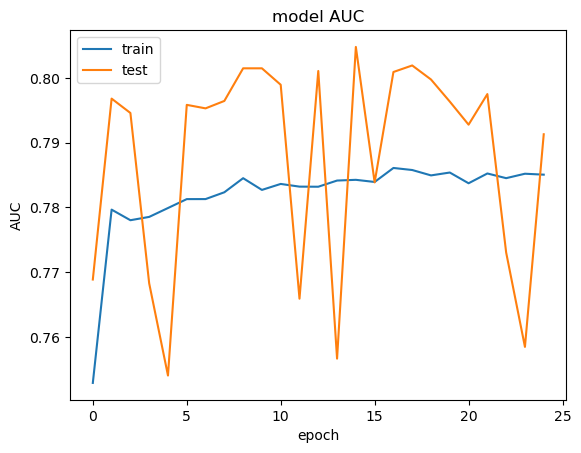

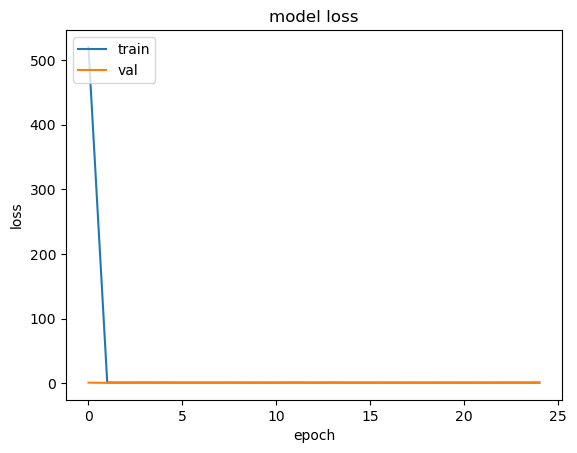

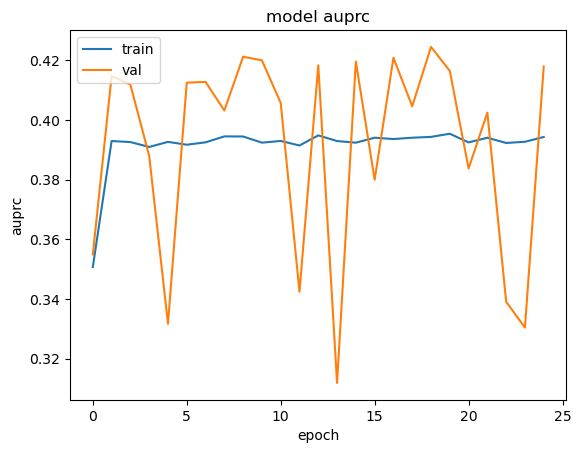

In [32]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
# plt.ylim(0.3, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['auprc'])
plt.plot(history.history['val_auprc'])
plt.title('model auprc')
# plt.ylim(0.3, 1)
plt.ylabel('auprc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
y_internaleval = internalEvaluationData[target_outcomes[0]]
y_eval = evaluationData[target_outcomes[0]]
y_eval_Wales = evaluationDataWales[target_outcomes[0]]
y_eval_Scotland = evaluationDataScotland[target_outcomes[0]]
print(model.evaluate(X_internaleval.values, y_internaleval))
print(model.evaluate(X_eval.values, y_eval))
print(model.evaluate(X_eval_Wales.values, y_eval_Wales))
print(model.evaluate(X_eval_Scotland.values, y_eval_Scotland))

3048/3048 [==============================] - 31s 10ms/step - loss: 0.7815 - auc: 0.8060 - auprc: 0.4309
[0.7815202474594116, 0.8059513568878174, 0.4309175908565521]
747/747 [==============================] - 8s 10ms/step - loss: 1.0707 - auc: 0.7752 - auprc: 0.4358
[1.0706827640533447, 0.7751855850219727, 0.43582871556282043]
478/478 [==============================] - 5s 11ms/step - loss: 1.1666 - auc: 0.8029 - auprc: 0.4599
[1.1666147708892822, 0.8028944730758667, 0.45985567569732666]
270/270 [==============================] - 3s 12ms/step - loss: 0.9005 - auc: 0.7281 - auprc: 0.3978
[0.9005434513092041, 0.7281439900398254, 0.397765189409256]


In [ ]:
best_model_dt = pickle.load(open('../Models_trainValEval/12months/DT0.sav', 'rb'))

# pd.DataFrame([best_model3.feature_importances_], columns=X.columns).T.sort_values(0, ascending=False)
sorted_idx = best_model_dt.feature_importances_.argsort()
plt.figure(figsize=(3,4))
plt.barh(X.columns[sorted_idx][-10:], best_model_dt.feature_importances_[sorted_idx][-10:])
plt.xlabel("Decision Tree Feature Importance")
plt.show()
dttop10 = X.columns[sorted_idx][-10:]

In [ ]:
best_model_dt = pickle.load(open('../Models_trainValEval/12months/RF0.sav', 'rb'))

# pd.DataFrame([best_model3.feature_importances_], columns=X.columns).T.sort_values(0, ascending=False)
sorted_idx = best_model_dt.feature_importances_.argsort()
plt.figure(figsize=(3,4))
plt.barh(X.columns[sorted_idx][-10:], best_model_dt.feature_importances_[sorted_idx][-10:])
plt.xlabel("Random Forest Feature Importance")
plt.show()
rftop10 = X.columns[sorted_idx][-10:]

In [ ]:
best_model_dt = pickle.load(open('../Models_trainValEval/12months/XGB0.sav', 'rb'))

# pd.DataFrame([best_model3.feature_importances_], columns=X.columns).T.sort_values(0, ascending=False)
sorted_idx = best_model_dt.feature_importances_.argsort()
plt.figure(figsize=(3,4))
plt.barh(X.columns[sorted_idx][-10:], best_model_dt.feature_importances_[sorted_idx][-10:])
plt.xlabel("XGBoost Feature Importance")
plt.show()
xgbtop10 = X.columns[sorted_idx][-10:]

In [ ]:
best_model_lasso = pickle.load(open('../Models_trainValEval/12months/LR0.sav', 'rb'))

# pd.DataFrame([best_model3.feature_importances_], columns=X.columns).T.sort_values(0, ascending=False)
sorted_idx = best_model_lasso.coef_[0].argsort()
plt.figure(figsize=(3,4))
plt.barh(X.columns[sorted_idx][-10:], best_model_lasso.coef_[0][sorted_idx][-10:])
plt.xlabel("LR Feature Importance")
plt.show()

In [ ]:
lassotop10 = X.columns[sorted_idx][-10:]

In [ ]:
list(set(dttop10).intersection(set(lassotop10)))

In [ ]:
prune_duplicate_leaves(best_model_dt)
fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(best_model_dt, 
                   feature_names=X.columns,  
                   class_names=['no asthma attack','asthma attack'],
                   filled=True,)
plt.savefig('../FinalData/dt.png',format='png',bbox_inches = "tight")

In [ ]:
trainingData['BTS_step_2.0'].unique()